# Project 1: SAT & ACT Analysis

## Problem Statement

Use exploratory data analysis to figure out suggestions to improve SAT participation rates for lower performing states.

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
sat_df = pd.read_csv('../data/sat_2017.csv')
act_df = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
act_df.head()


,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [4]:
sat_df.head()


,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer:
Both the SAT and ACT datasets has rows containing each state, it's participation rate, individual test scores, and total/composite scores.
The individual test scores are different for the ACT and SAT. The ACT includes a science section whereas the SAT does not.

#### 4a. Does the data look complete? 

In [5]:
act_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


In [6]:
sat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [7]:
sat_df.State.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [8]:
sat_df.isnull().sum()
act_df.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

Answer:
ACT dataset includes national average. Should be removed so it doesnt affect overall comparison.
The Participation category datatype is a string due to the '%'
The district of columbia is in both dataset resulting in a number over 50.
No null values in either dataset.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: 

For the SAT the lowest possible composite score was 400. Individually, the lowest scores for the Evidence-Based Reading and Writing and Math sections were both 200.

For the ACT the lowest possible score for each of the English, Math, Reading, and Science sections is 1. Since the composite score is found by averaging all the sections the lowest possible score is also 1. 


Obvious Errors: 
Letter in Wyoming entry of Act composite score.
Maryland Science score suspiciously low. Looks off by an order of magnitude.


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [9]:
#Letter in Wyoming entry of Act composite score
act_df['Composite'][51] = 20.2


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### 5. What are your data types? 
Display the data types of each feature. 

In [10]:
#code
sat_df.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

In [11]:
act_df.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

Answer: For the act data frame composite should be a float64 just like the rest of the individual scores. Participation in both dataframes is a object because the '%' sign was used.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [12]:
#code
try:
    sat_df['Participation'] = sat_df['Participation'].str.rstrip('%').astype('float') /100
except:
    pass
try: 
    act_df['Participation'] = act_df['Participation'].str.rstrip('%').astype('float') /100
except:
    pass
try:
    act_df['Composite'] = act_df['Composite'].astype('float')
except:
    pass


- Fix any individual values preventing other columns from being the appropriate type.

In [13]:
#code
act_df['Composite'][51] = 20.2
act_df['Composite'] = act_df['Composite'].astype('float')



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


- Finish your data modifications by making sure the columns are now typed appropriately.

In [14]:
#code
print(sat_df.dtypes)
print("\n")
print(act_df.dtypes)

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object


State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


- Display the data types again to confirm they are correct.

In [15]:
#Code:
act_df.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [16]:
#code
act_df.rename(columns={'Participation':'ACT Participation','English':'ACT English',
                           'Math':'ACT Math', 'Reading':'ACT Reading', 'Science':'ACT Science',
                           'Composite':'ACT Composite'},inplace = True)
sat_df.rename(columns={'Participation':'SAT Participation', 'Math':'SAT Math', 
                           'Evidence-Based Reading and Writing':'SAT Reading and Writing','Total':'SAT Total'},inplace = True)


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|State|Type|Dataset|Description|
|---|---|---|---|
|SAT Participation|float|SAT|State participation in SAT in percentage| 
|SAT Reading and Writing|float|SAT|SAT Reading and Writing score average| 
|SAT Math|float|SAT|SAT Math score average| 
|SAT Total|float|SAT|Total SAT score average|
|ACT Participation|float|ACT|State participation in ACT in percentage| 
|ACT English|float|ACT|ACT English score average| 
|ACT Math|float|ACT|ACT Math score average| 
|ACT Reading|float|ACT|ACT Reading score average| 
|ACT Composite|float|ACT|ACT Composite score average| 

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [17]:
#code
sat_df.columns
act_df.columns

Index(['State', 'ACT Participation', 'ACT English', 'ACT Math', 'ACT Reading',
       'ACT Science', 'ACT Composite'],
      dtype='object')

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [18]:
#Code:
combined_df = pd.merge(sat_df, act_df, how='inner', on='State')
combined_df.head()

,State,SAT Participation,SAT Reading and Writing,SAT Math,SAT Total,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [19]:
#code
combined_df.to_csv("combined_2017.csv")

## 2018 Data Import and Cleaning

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [20]:
sat18_df = pd.read_csv('../data/East_Coast_Data_Entry - SAT 2018.csv')
act18_df = pd.read_csv('../data/East_Coast_Data_Entry - ACT 2018.csv')

#rename columns so names don't overlap and for readability
act18_df.rename(columns={'Participation':'2018 ACT Participation',
                           'Composite':'2018 ACT Composite'},inplace = True)
sat18_df.rename(columns={'Participation':'2018 SAT Participation', 'Math':'2018 SAT Math', 
                           'Evidence-Based Reading and Writing':'2018 SAT Reading and Writing','Total':'2018 SAT Total'},inplace = True)
# act18_df.head()
# sat18_df.head()

#merge dataframe on same column state
final_df = pd.merge(sat18_df, act18_df, how='inner', on='State')
final_df = pd.merge(final_df, combined_df, how='inner', on='State')
final_df['2018 SAT Participation'] = final_df['2018 SAT Participation'].str.rstrip('%').astype('float') /100
final_df['2018 ACT Participation'] = final_df['2018 ACT Participation'].str.rstrip('%').astype('float') /100
final_df.to_csv("final.csv")

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [21]:
#Code:
final_df.T.describe

<bound method NDFrame.describe of                                    0       1        2         3           4   \
State                         Alabama  Alaska  Arizona  Arkansas  California   
2018 SAT Participation           0.06    0.43     0.29      0.05         0.6   
2018 SAT Reading and Writing      595     562      577       592         540   
2018 SAT Math                     571     544      572       576         536   
2018 SAT Total                   1166    1106     1149      1168        1076   
2018 ACT Participation              1    0.33     0.66         1        0.27   
2018 ACT Composite               19.1    20.8     19.2      19.4        22.7   
SAT Participation                0.05    0.38      0.3      0.03        0.53   
SAT Reading and Writing           593     547      563       614         531   
SAT Math                          572     533      553       594         524   
SAT Total                        1165    1080     1116      1208        1055   
ACT Pa

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [22]:
#standard deviation of a column
def std(col): #takes a column of the dataframe as a argument
    n=len(col)
    sd = ((1.0/n)*np.sum([(x-np.mean(col))**2 for x in col]))**(0.5)
    return sd


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [23]:
#make list of columns
cols = final_df.columns[1:].tolist()
#run std method over list of columns and add it to a list
standard_dev = [round( std([final_df[col].tolist() for col in cols][i] ) ,3) for i in range(0,len(cols))]

sd_dict = {}
for i in range(len(cols)):
    sd_dict[cols[i]]=standard_dev[i]
    
print(sd_dict)


{'2018 SAT Participation': 0.367, '2018 SAT Reading and Writing': 44.171, '2018 SAT Math': 48.179, '2018 SAT Total': 92.01, '2018 ACT Participation': 0.338, '2018 ACT Composite': 2.09, 'SAT Participation': 0.342, 'SAT Reading and Writing': 43.939, 'SAT Math': 84.144, 'SAT Total': 89.009, 'ACT Participation': 0.318, 'ACT English': 2.301, 'ACT Math': 1.954, 'ACT Reading': 2.026, 'ACT Science': 3.163, 'ACT Composite': 1.984}


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [24]:
final_df.describe()

,2018 SAT Participation,2018 SAT Reading and Writing,2018 SAT Math,2018 SAT Total,2018 ACT Participation,2018 ACT Composite,SAT Participation,SAT Reading and Writing,SAT Math,SAT Total,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Composite
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000
mean,0.443000,569.120000,560.020000,1129.140000,0.623200,21.454000,0.386000,570.860000,549.220000,1129.620000,0.659200,20.862000,21.13600,21.956000,20.992000,21.466000
std,0.370704,44.619772,48.668177,92.944137,0.341141,2.111312,0.345602,44.385146,84.998269,89.913085,0.321107,2.324307,1.97399,2.046317,3.195139,2.004241
min,0.020000,505.000000,486.000000,997.000000,0.070000,17.700000,0.020000,503.000000,52.000000,996.000000,0.080000,16.300000,18.00000,18.100000,2.300000,17.800000
25%,0.042500,536.250000,525.000000,1065.000000,0.277500,19.925000,0.040000,535.250000,523.250000,1057.000000,0.310000,19.000000,19.40000,20.425000,19.900000,19.800000
50%,0.455000,558.000000,547.000000,1102.500000,0.660000,21.050000,0.340000,559.500000,549.500000,1107.500000,0.710000,20.550000,20.90000,21.700000,21.100000,21.400000
75%,0.745000,617.250000,604.000000,1225.000000,1.000000,23.650000,0.650000,613.500000,601.000000,1214.000000,1.000000,23.100000,23.00000,23.875000,22.275000,23.400000
max,1.000000,643.000000,655.000000,1298.000000,1.000000,25.600000,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.30000,26.000000,24.900000,25.500000


Answer:
It somewhat matches up but I believe the differences are from the rounding of numbers.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [25]:
final_df.sort_values('SAT Participation',ascending=False).head()

,State,2018 SAT Participation,2018 SAT Reading and Writing,2018 SAT Math,2018 SAT Total,2018 ACT Participation,2018 ACT Composite,SAT Participation,SAT Reading and Writing,SAT Math,SAT Total,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Composite
21,Michigan,1.00,511,499,1010,0.22,24.2,1.00,509,495,1005,0.29,24.1,23.7,24.5,23.8,24.1
6,Connecticut,1.00,535,519,1054,0.26,25.6,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2
7,Delaware,1.00,505,492,997,0.17,23.8,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1
28,New Hampshire,0.96,535,538,1073,0.16,25.1,0.96,532,520,1052,0.18,25.4,25.1,26.0,24.9,25.5
18,Maine,0.99,512,501,1013,0.07,24.0,0.95,513,499,1012,0.08,24.2,24.0,24.8,23.7,24.3


In 2017 only three states had full 100% participation in the SATs. These states were Michigan, Connecticut, and Delaware.

In [26]:
final_df.sort_values('2018 SAT Participation',ascending=False).head()

,State,2018 SAT Participation,2018 SAT Reading and Writing,2018 SAT Math,2018 SAT Total,2018 ACT Participation,2018 ACT Composite,SAT Participation,SAT Reading and Writing,SAT Math,SAT Total,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Composite
21,Michigan,1.00,511,499,1010,0.22,24.2,1.00,509,495,1005,0.29,24.1,23.7,24.5,23.8,24.1
6,Connecticut,1.00,535,519,1054,0.26,25.6,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2
7,Delaware,1.00,505,492,997,0.17,23.8,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1
11,Idaho,1.00,508,493,1001,0.36,22.3,0.93,513,493,1005,0.38,21.9,21.8,23.0,22.1,22.3
18,Maine,0.99,512,501,1013,0.07,24.0,0.95,513,499,1012,0.08,24.2,24.0,24.8,23.7,24.3


In 2018 a fourth state, Idaho, increased its SAT  participation to 100%.  Maine also had very close to full participation with its percentage at 99.

In [27]:
final_df.sort_values('ACT Participation',ascending=False).head()

,State,2018 SAT Participation,2018 SAT Reading and Writing,2018 SAT Math,2018 SAT Total,2018 ACT Participation,2018 ACT Composite,SAT Participation,SAT Reading and Writing,SAT Math,SAT Total,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Composite
0,Alabama,0.06,595,571,1166,1.0,19.1,0.05,593,572,1165,1.0,18.9,18.4,19.7,19.4,19.2
16,Kentucky,0.04,630,618,1248,1.0,20.2,0.04,631,616,1247,1.0,19.6,19.4,20.5,20.1,20.0
48,Wisconsin,0.03,641,653,1294,1.0,20.5,0.03,642,649,1291,1.0,19.7,20.4,20.6,20.9,20.5
43,Utah,0.04,618,612,1230,1.0,20.4,0.03,624,614,1238,1.0,19.5,19.9,20.8,20.6,20.3
41,Tennessee,0.06,624,607,1231,1.0,19.6,0.05,623,604,1228,1.0,19.5,19.2,20.1,19.9,19.8


Multiple states had states had 100% participation in the ACT during 2017 including Alabama, Kentucky, Wisconsin, Utah, and Tennessee. Majority of these states were from the Midwest and the South.

In [28]:
final_df.sort_values('2018 ACT Participation',ascending=False).head()

,State,2018 SAT Participation,2018 SAT Reading and Writing,2018 SAT Math,2018 SAT Total,2018 ACT Participation,2018 ACT Composite,SAT Participation,SAT Reading and Writing,SAT Math,SAT Total,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Composite
0,Alabama,0.06,595,571,1166,1.0,19.1,0.05,593,572,1165,1.0,18.9,18.4,19.7,19.4,19.2
16,Kentucky,0.04,630,618,1248,1.0,20.2,0.04,631,616,1247,1.0,19.6,19.4,20.5,20.1,20.0
48,Wisconsin,0.03,641,653,1294,1.0,20.5,0.03,642,649,1291,1.0,19.7,20.4,20.6,20.9,20.5
43,Utah,0.04,618,612,1230,1.0,20.4,0.03,624,614,1238,1.0,19.5,19.9,20.8,20.6,20.3
41,Tennessee,0.06,624,607,1231,1.0,19.6,0.05,623,604,1228,1.0,19.5,19.2,20.1,19.9,19.8


In 2018 again multiple states had states had 100% participation in the ACT. The majority of the states were still from the Midwest and the South.

### 

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


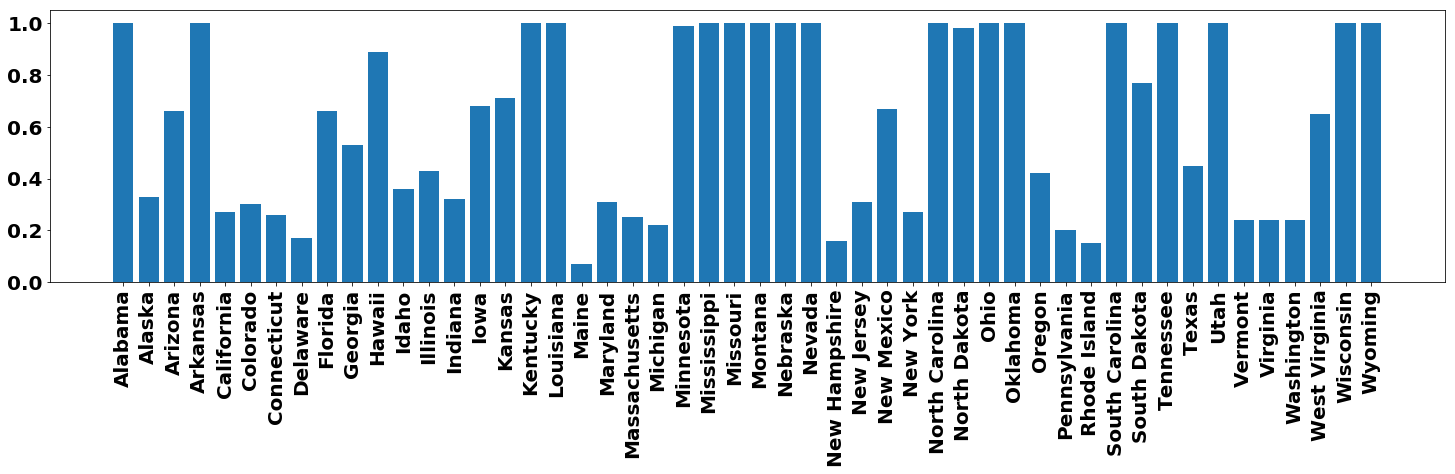

In [29]:
plt.figure(figsize=(25,5))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}

plt.rc('font', **font)
plt.bar(final_df['State'],final_df['2018 ACT Participation'])
plt.xticks(rotation=90);



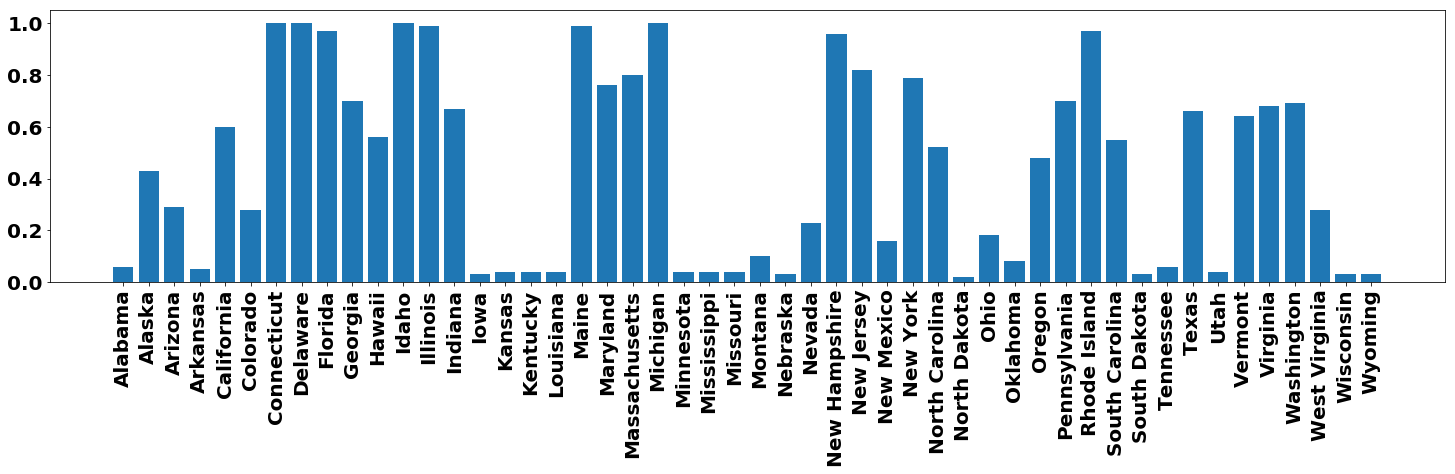

In [30]:
plt.figure(figsize=(25,5))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}

plt.rc('font', **font)
plt.bar(final_df['State'],final_df['2018 SAT Participation'])
plt.xticks(rotation=90);


In [31]:
#code
final_df.sort_values('2018 SAT Participation', ascending=False).T.head()


,21,6,7,11,18,12,38,8,28,29,...,17,43,16,15,26,40,14,48,49,33
State,Michigan,Connecticut,Delaware,Idaho,Maine,Illinois,Rhode Island,Florida,New Hampshire,New Jersey,...,Louisiana,Utah,Kentucky,Kansas,Nebraska,South Dakota,Iowa,Wisconsin,Wyoming,North Dakota
2018 SAT Participation,1,1,1,1,0.99,0.99,0.97,0.97,0.96,0.82,...,0.04,0.04,0.04,0.04,0.03,0.03,0.03,0.03,0.03,0.02
2018 SAT Reading and Writing,511,535,505,508,512,513,513,522,535,547,...,615,618,630,633,629,622,634,641,633,640
2018 SAT Math,499,519,492,493,501,506,505,493,538,547,...,595,612,618,631,623,618,631,653,625,643
2018 SAT Total,1010,1054,997,1001,1013,1019,1018,1015,1073,1094,...,1210,1230,1248,1264,1252,1240,1265,1294,1258,1283


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


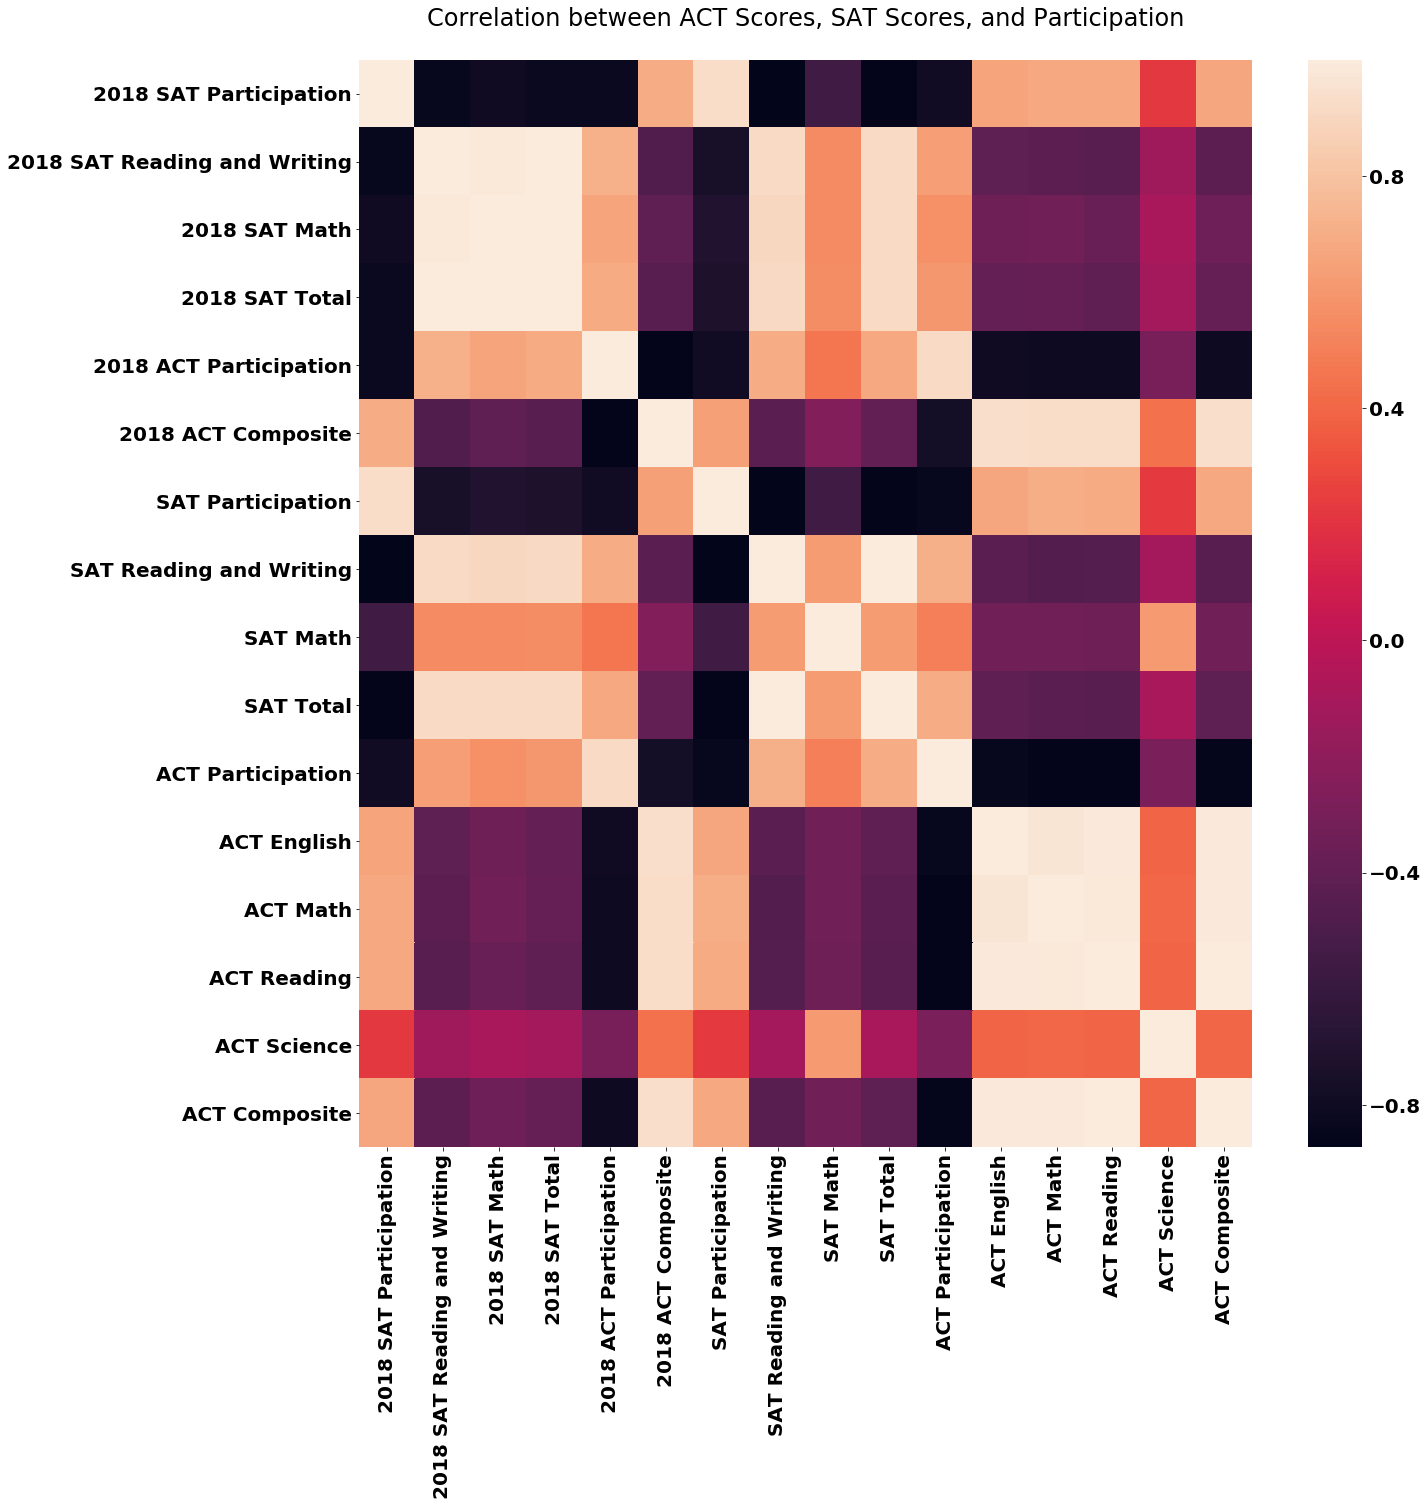

In [32]:
plt.figure(figsize=(20,20));
sns.heatmap(final_df.corr(), xticklabels=True, yticklabels=True)
plt.title('Correlation between ACT Scores, SAT Scores, and Participation\n');



#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [33]:
def subplot_histograms(dataframe, list_of_columns,titles,labels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(figsize=(22,25),nrows=nrows, ncols=2)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_xlabel(labels[i])
        ax[i].set_title(titles[i])
        


#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


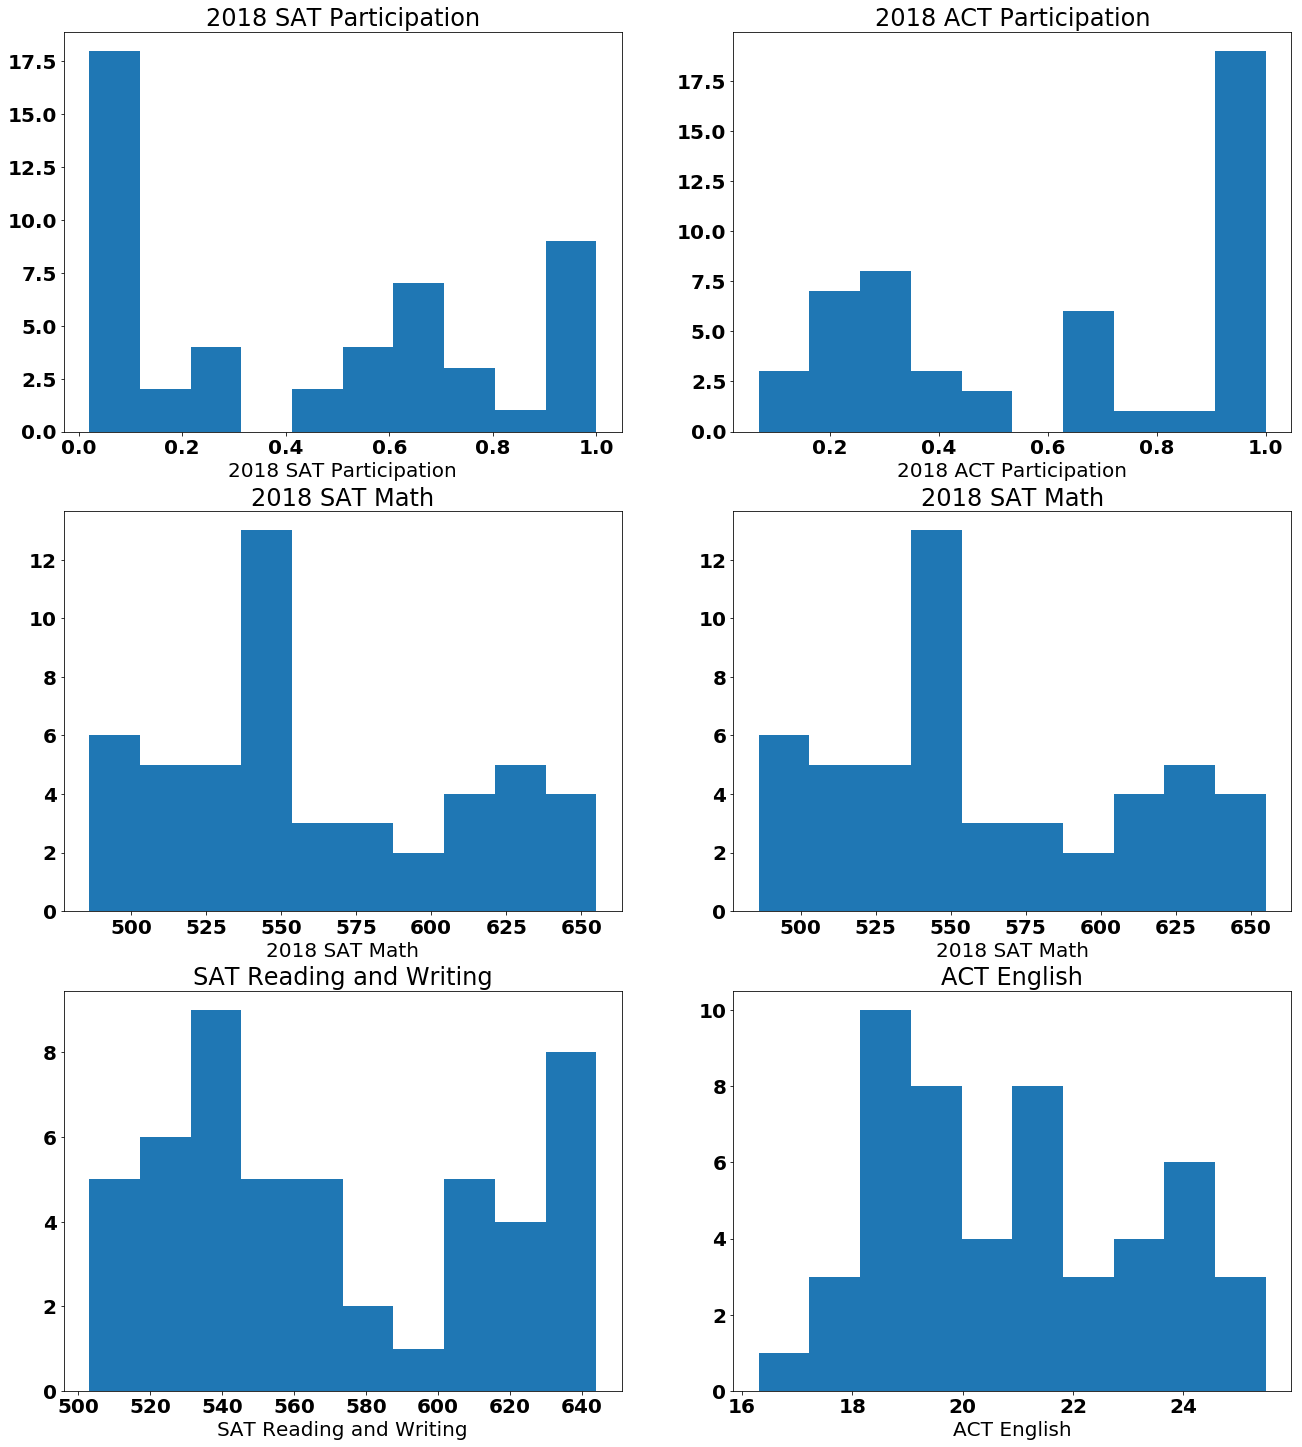

In [34]:
cols = ['2018 SAT Participation', 
          '2018 ACT Participation', '2018 SAT Math',
         '2018 SAT Math',
         'SAT Reading and Writing','ACT English']
titles = ['2018 SAT Participation', 
          '2018 ACT Participation', '2018 SAT Math',
         '2018 SAT Math',
         'SAT Reading and Writing','ACT English']
labels = ['2018 SAT Participation', 
          '2018 ACT Participation', '2018 SAT Math',
         '2018 SAT Math',
         'SAT Reading and Writing','ACT English']

subplot_histograms(final_df, cols,titles,labels)

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


Text(0, 0.5, 'ACT Math')

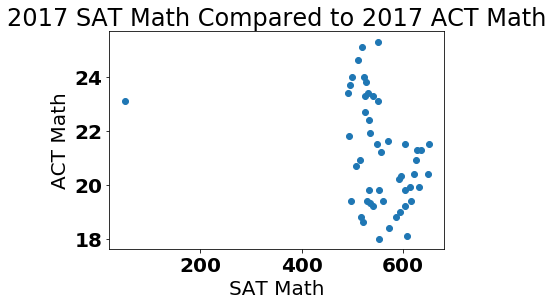

In [35]:
# Code
plt.scatter(final_df['SAT Math'],final_df['ACT Math'])
plt.title('2017 SAT Math Compared to 2017 ACT Math')
plt.xlabel('SAT Math')
plt.ylabel('ACT Math')

Text(0, 0.5, 'ACT English')

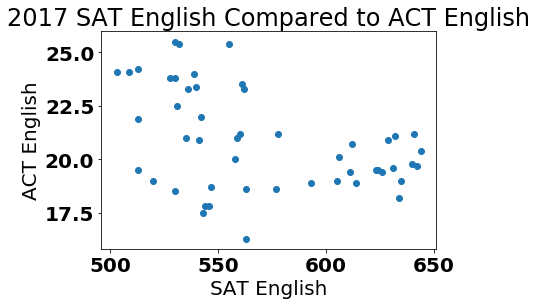

In [36]:
plt.scatter(final_df['SAT Reading and Writing'],final_df['ACT English'])
plt.title('2017 SAT English Compared to ACT English')
plt.xlabel('SAT English')
plt.ylabel('ACT English')

Text(0, 0.5, 'ACT Composite')

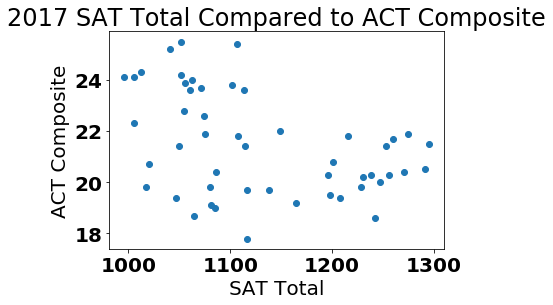

In [37]:
plt.scatter(final_df['SAT Total'],final_df['ACT Composite'])
plt.title('2017 SAT Total Compared to ACT Composite')
plt.xlabel('SAT Total')
plt.ylabel('ACT Composite')

Text(0, 0.5, '2018 SAT Total')

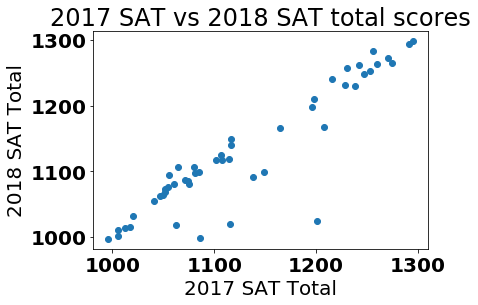

In [38]:
plt.scatter(final_df['SAT Total'],final_df['2018 SAT Total'])
plt.title('2017 SAT vs 2018 SAT total scores')
plt.xlabel('2017 SAT Total')
plt.ylabel('2018 SAT Total')

Text(0, 0.5, '2018 ACT Composite')

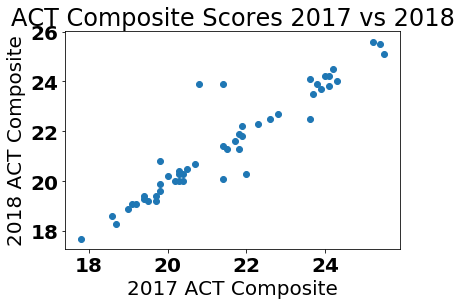

In [39]:
plt.scatter(final_df['ACT Composite'],final_df['2018 ACT Composite'])
plt.title('ACT Composite Scores 2017 vs 2018')
plt.xlabel('2017 ACT Composite')
plt.ylabel('2018 ACT Composite')

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

Text(0.5, 1.0, 'Participation Rates')

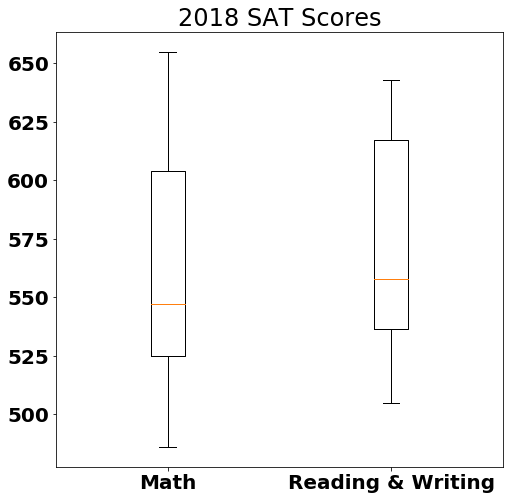

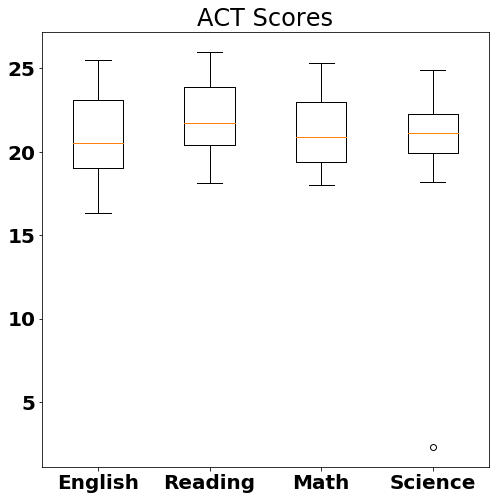

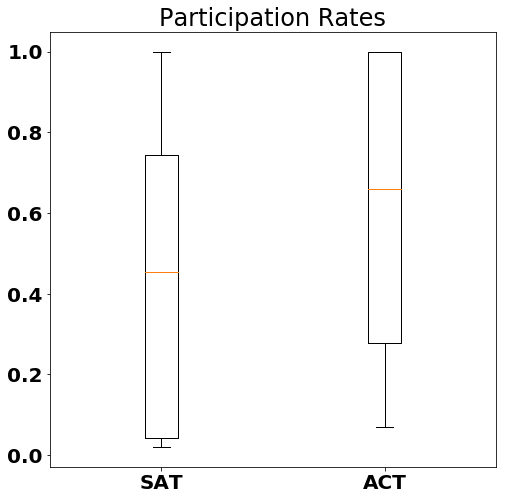

In [40]:
# Code
sat_boxplots = [final_df['2018 SAT Math'], final_df['2018 SAT Reading and Writing']]
sat_labels = ('Math', 'Reading & Writing')
plt.figure(1,figsize =(8,8))
plt.boxplot(sat_boxplots, labels = sat_labels)
plt.title('2018 SAT Scores');

act_boxplots = [final_df['ACT English'], final_df['ACT Reading'], final_df['ACT Math'], 
                      final_df['ACT Science']]
act_labels = ('English', 'Reading', 'Math', 'Science')
plt.figure(2,figsize =(8,8))
plt.boxplot(act_boxplots, labels = act_labels)
plt.title('ACT Scores')

part_boxplots = [final_df['2018 SAT Participation'],final_df['2018 ACT Participation']]
part_labels = ('SAT', 'ACT')
plt.figure(3,figsize =(8,8))
plt.boxplot(part_boxplots, labels = part_labels)
plt.title('Participation Rates')

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

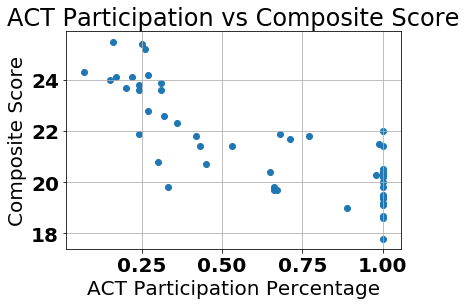

In [41]:
plt.scatter(final_df['2018 ACT Participation'],final_df['ACT Composite'])
plt.title("ACT Participation vs Composite Score")
plt.xlabel("ACT Participation Percentage")
plt.ylabel("Composite Score")
plt.grid()
plt.savefig('ACTpartscore.png')
plt.show()

As the ACT participation goes up in a state the overall score goes down. When fewer people take the exam, it is not required by the state so it is possible they are more motivated and that has a better chance of raising their scores.

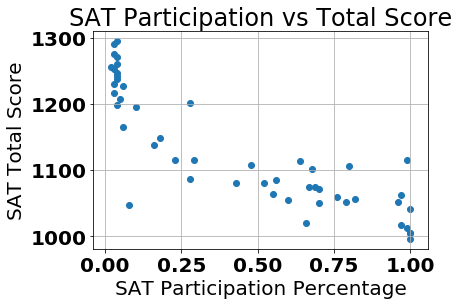

In [42]:
plt.scatter(final_df['2018 SAT Participation'],final_df['SAT Total'])
plt.title("SAT Participation vs Total Score")
plt.xlabel("SAT Participation Percentage")
plt.ylabel("SAT Total Score")
plt.grid()
plt.savefig('SATpartscore.png')
plt.show()

As with the ACT participation, when the SAT participation goes up in a state the overall score goes down.

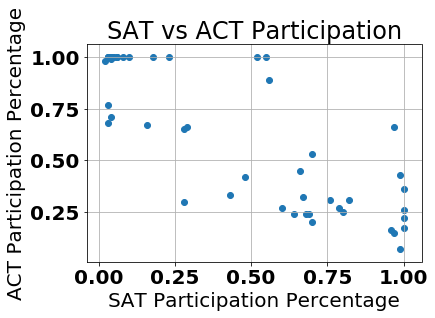

In [43]:
plt.scatter(final_df['2018 SAT Participation'],final_df['2018 ACT Participation'])
plt.title("SAT vs ACT Participation")
plt.xlabel("SAT Participation Percentage")
plt.ylabel("ACT Participation Percentage")
plt.grid()
plt.savefig('SATvACT.png')
plt.show()

The is a negative correlation between the ACT and SAT participation rates. As one goes up the other decreases. This makes sense due to state requirements.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:
With the SAT and ACT scores their  SAT Math and SAT Reading
 and Writing have a linear relationship.  This stands to reason since students who have a high Math score will
 tend to also have a high Reading and Writing score.  The scatterplot for this relationship makes that pretty clear.
This also holds true for the ACT scores.  Each of the ACT score variables have a positive linear relationship
with each other so that students with high Math scores tend to have high English and Science scores.

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:  
If the sample size is over 30 the data is normally distributed due to the Central Limit Theorem.



Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

In [52]:
# final_df["2018 SAT Math"].mean()
# final_df["2018 SAT Math"].median()

# final_df["2018 SAT Reading and Writing"].mean()
# final_df["2018 SAT Reading and Writing"].median()

# final_df["ACT English"].mean()
final_df["ACT English"].median()

20.549999999999997

Answer:  
  
SAT Math Score distribution:  
the mean:  560.02
the median: 547.0
The distribution should not be normally distributed since the mean is larger than the median. The histogram  supports this by showing a left skewed distribution.
  
  
SAT Verbal Score distribution:   
the mean: 569.12  
the median: 558.0   
The median is larger than the mean so the distribution should show a  left skewed distribution.

ACT English Score distribution
the mean: 20.862
the median: 20.549999999999997
The mean and median are almost identical, so the distribution should be normally distributed. The histogram shows that the values are closely centered around the mean.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:
All the data we have is at the state to state level data so it is not granular at all. All the states data is weighted the same with no regard to actual student population size state to state. The actual population of students who took each test is not considered either. To get much more reliable results from statistical inference we would need much more data at a more granular level.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:
It's not be appropriate to compare between the ACT and SAT Math scores since the test are structured completely different. We don't know what is being tested or how and the scores themselves are significantly
different between the two tests. The math section of the SAT has a scores range from 200 to 800 while the math section of the ACT range between 1 to 36.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [44]:
# Code:
import scipy.stats as stats
np.corrcoef(final_df['2018 ACT Participation'],final_df['2018 SAT Participation'])
stats.ttest_rel(final_df['2018 ACT Participation'],final_df['2018 SAT Participation'])

# If we have an alpha of 0.05, our p value is greater than our alpha 
# that means that our populations are similar

Ttest_relResult(statistic=1.872069852790818, pvalue=0.06717144447104821)

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [45]:
final_df[['State','2018 ACT Participation','ACT Participation']]
# Illinois SAT
# colorado ACT
#alaska ACT
ill = final_df[['State','2018 SAT Participation','SAT Participation']]
print(ill[(final_df['State']=='Illinois')])
print('\n')
colo = final_df[['State','2018 ACT Participation','ACT Participation']]
print(colo[(final_df['State']=='Colorado')])
print('\n')
ala = final_df[['State','2018 ACT Participation','ACT Participation']]
print(ala[(final_df['State']=='Alaska')])




       State  2018 SAT Participation  SAT Participation
12  Illinois                    0.99               0.09


      State  2018 ACT Participation  ACT Participation
5  Colorado                     0.3                1.0


    State  2018 ACT Participation  ACT Participation
1  Alaska                    0.33               0.65


Illinois had a drastic change in SAT participation between 2017 and 2018. It went from 9%  to 99%. Doing some research I found out the the Illinois State Board of Education had changed from ACT to the SAT for all juniors.
    
Source:  
https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html

Colorado went from 100% ACT participation in 2017 to 33% in 2018. The lack of participation is attributed to Colorado changing their state sponsored test to the SAT.
  
Source:  
https://www.denverpost.com/2017/03/06/colorado-juniors-sat-college-exam/  

I chose Alaska as the third state to focus on because there was an interesting decrease of 32% in ACT participation from 2017 to 2018. The population of students from Alaska who take either exam is much smaller than the majority of the other states in the USA. It is possible that student population can change from year to year.
After doing some research I learned that the state requires students to pass one of a group of exams called "Basic Competency Examination Requirement" This large set of exams can change the participation from year to year.

Source:  
https://education.alaska.gov/teachercertification/praxis

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

[Conclusion and Suggestions Slides](./SATvsACT.pdf)  
  
Sources:  
https://mitadmissions.org/apply/process/stats/  
https://collegereadiness.collegeboard.org/pdf/guide-2018-act-sat-concordance.pdf
 